# Lineal Reagression for the prediction of house prices

## Installing the basic libraries to work with data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb

### Opening the dataset of the house size and price

In [2]:
dataset=pd.read_csv(r"Housing_Data.csv")
print(dataset)

    Size(Sq. Ft)   Price
0            477   50367
1            496   61683
2            524   63517
3            571   63755
4            770   66702
5            785   74219
6            795   79334
7            796   86903
8            826   89792
9            834  103661
10           908  103818
11           909  114935
12           968  118364
13           972  118525
14          1049  125973
15          1399  130772
16          1560  135628
17          1589  157694
18          1773  158000
19          1773  159783
20          1830  163317
21          1941  166568
22          2116  175962
23          2131  176490
24          2190  176554
25          2227  183504
26          2273  189318
27          2353  193021
28          2373  228260
29          2463  248586
30          2520  260935
31          2563  267310
32          2688  282501
33          2739  284099
34          2765  285320
35          2835  287325
36          2916  308882
37          2946  312044
38          3102  318194


In [3]:
indepX=dataset.iloc[:,[0]].values #Assigning size of the house as an independent x variable
depY=dataset.iloc[:,[1]].values #Assigning price of the house as an dependent y variable

## Transformation and skalling data to make its more customice to understand 

In [4]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
indepX=scale.fit_transform(indepX)
depY=scale.fit_transform(depY)
from sklearn.model_selection import train_test_split
indepX_train, indepX_test, depY_train, depY_test = train_test_split(indepX, depY, test_size = 0.3, random_state = 42)


C:\Users\Anna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Anna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Anna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Anna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### LOOK AT THIS SCALLING

In [30]:
print(scale.mean_)
#print(scale.transform(dataset))
print(scale.transform([[2, 2]])) #looking max and min of dataset points while transforming it

[217476.08]
[[-1.84278516 -1.84278516]]


In [6]:
from sklearn.linear_model import SGDRegressor
SLR = SGDRegressor(max_iter = 100, shuffle = True, learning_rate='optimal')
depY_train = np.ravel(depY_train)
SLR.fit(indepX_train, depY_train)

C:\Users\Anna\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='squared_loss', max_iter=100,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [7]:
#Hypothesis function
def hyp(theta,x):
    return theta[0]+theta[1]*x
    

In [8]:
#Error function
def errorFun(theta,indepX,depY):
    m=len(indepX)
    error=0
    for i in range(m):
        x=indepX[i]
        y=depY[i]
        error+=(y-(theta[1])*x+theta[0])**2
    return error/(2*m)

In [9]:
#Gradient Descend
def gradientDescent(indepX_train,depY_train,init_theta,learning_rate,num_iterations):
    theta=init_theta
    J=[0 for i in range(num_iterations)]
    for i in range(num_iterations):
        theta=grad(indepX,depY,theta,learning_rate)
        J[i]=errorFun(theta,indepX,depY)
    return theta,J

In [19]:
#Gradient/Del function


def grad(indepX, depY, curr_theta, learning_rate):
#     pdb.set_trace()  for debugging process 
    # Initialization
    grad = np.zeros(2)
    new_theta = curr_theta
    m = len(indepX)
    
    for i in range(m):
        x=indepX[i]
        y=depY[i]
        grad[0]+=(-1/m)*(y-(curr_theta[0]+(curr_theta[1]*x)))
        grad[1]+=(-1/m)*x*(y-(curr_theta[0]+(curr_theta[1]*x)))
    temp0=curr_theta[0]-(learning_rate*grad[0])
    temp1=curr_theta[1]-(learning_rate*grad[1])
    new_theta[0]=temp0
    new_theta[1]=temp1
    
    return new_theta
    
    

In [28]:
def main():
    init_theta=np.zeros(2)
    learning_rate=0.2
    num_iterations=100
    H =[i for i in (indepX_train)]
    for i in range(len(depY_test)):
        print(float (H[i]) )
        print(depY_train[i])
        print("-----------------------------------------------")
    theta, J = gradientDescent(indepX_train,depY_train,init_theta,learning_rate,num_iterations)
    J[i]=errorFun(theta,indepX,depY)
    H=hyp(theta,indepX_train)
    
    
    #Visualizaion
    plt.scatter(indepX_train, depY_train,color="red")
    plt.plot(indepX_train, H ,color="blue")
    plt.title("Size&Price")
    plt.xlabel("size")
    plt.ylabel("price")
    plt.show()
   #Visualization J
    plt.plot(J ,color="green")
    plt.title("Iterations and Cost function")
    plt.xlabel("Iterations")
    plt.ylabel("Cost Function")
    plt.show()

-1.2425561598768262
-1.170558691884612
-----------------------------------------------
1.249183226472936
1.1725147343043778
-----------------------------------------------
1.3932089635758877
1.7300427496002233
-----------------------------------------------
1.4393348532363104
1.8144735530595189
-----------------------------------------------
-0.673983968960598
-0.7346944136490398
-----------------------------------------------
-1.2058437170858778
-0.9644217834387788
-----------------------------------------------
-0.5224274743620669
-0.6935466836612498
-----------------------------------------------
0.07061967841479377
-0.34675673360352927
-----------------------------------------------
0.6118928734095476
0.5748812400068414
-----------------------------------------------
0.4217412466461732
0.4222719696031971
-----------------------------------------------
-1.5419037703260987
-1.4160130359036216
-----------------------------------------------
1.275540877707463
1.5150255238094141
-------

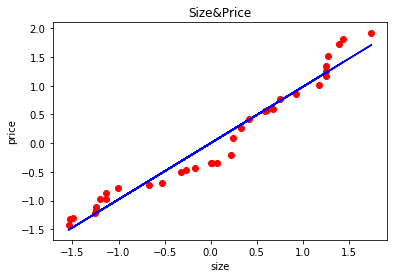

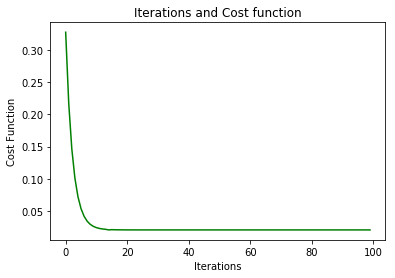

In [29]:
if __name__=="__main__":
    main()